In [1]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/vicllano/Downloads/movies.csv')

In [2]:
# Now let's take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

nulls = df.isnull().sum()
pct = []
for x in nulls:
    y =x/len(df)*100
    z = round(y, 2)
    pct.append(z)


In [4]:
nulls = pd.DataFrame(nulls, columns =['nulls'])
nulls['%'] = pct
nulls.sort_values(by=['nulls'], ascending=False)

,nulls,%
budget,2171,28.31
gross,189,2.46
rating,77,1.00
company,17,0.22
runtime,4,0.05
score,3,0.04
votes,3,0.04
writer,3,0.04
country,3,0.04
released,2,0.03


In [5]:
# Data Types for our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.fillna(method='ffill', inplace=True)
df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')

In [8]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,10000000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Not Rated,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,1200000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20000000,682,Roxwell Films,93.0
2417,Madadayo,PG,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


<AxesSubplot:>

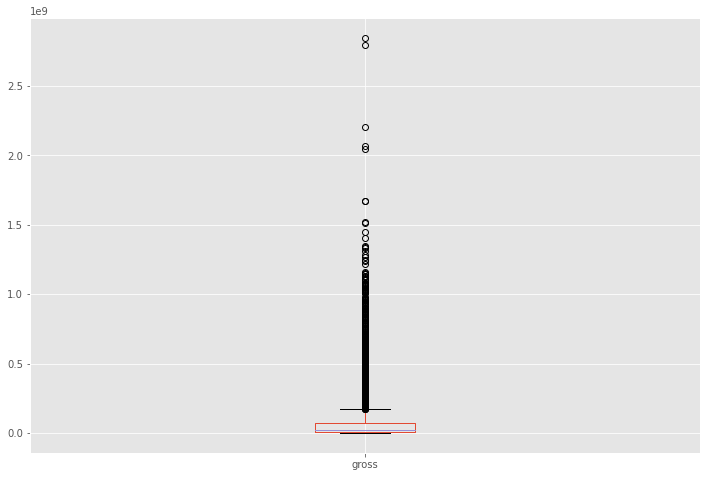

In [9]:
# Are there any Outliers?
df.boxplot(column=['gross'])

In [10]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted

,gross
company,
Warner Bros.,56503220422
Universal Pictures,52516382502
Columbia Pictures,43008941346
Paramount Pictures,40498350702
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [11]:
# The top 15 compaies by gross revenue by year

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSum.sort_values('gross', ascending = False)[:15]

gross
company               year            
Walt Disney Pictures  2019  5773131804
Marvel Studios        2018  4018631866
Universal Pictures    2015  3834354888
Twentieth Century Fox 2009  3793491246
Walt Disney Pictures  2017  3789382071
Paramount Pictures    2011  3565705182
Warner Bros.          2010  3300479986
                      2011  3223799224
Walt Disney Pictures  2010  3104474158
Paramount Pictures    2014  3071298586
Columbia Pictures     2006  2934631933
                      2019  2932757449
Marvel Studios        2019  2797501328
Warner Bros.          2018  2774168962
Columbia Pictures     2011  2738363306

<AxesSubplot:xlabel='gross', ylabel='budget'>

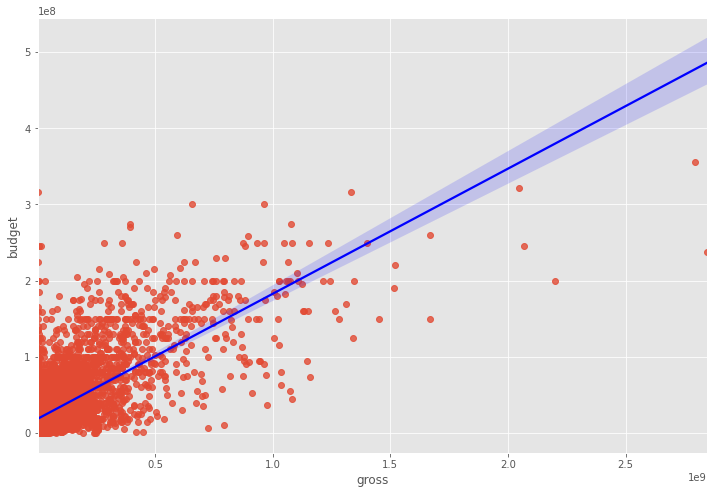

In [12]:
#Linear regression plot
sns.regplot(x="gross", y="budget", data=df, line_kws={'color':'blue'})

<AxesSubplot:xlabel='year', ylabel='gross'>

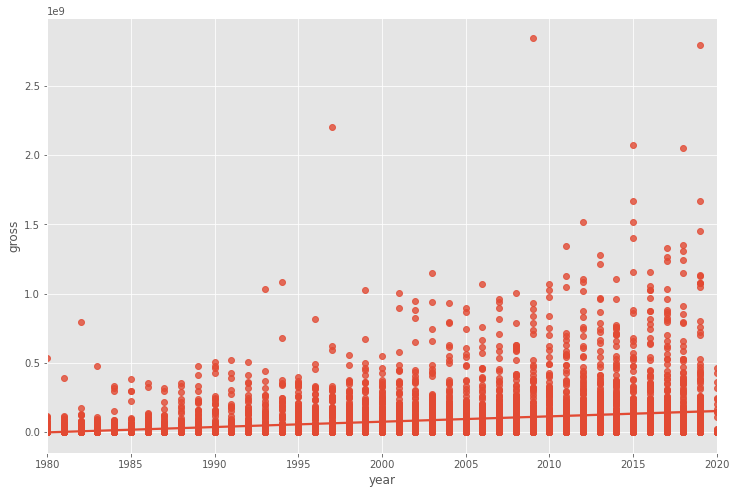

In [13]:
sns.regplot(x="year", y="gross", data=df)

In [14]:
# Correlation Matrix between all numeric columns
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098098,0.222427,0.334314,0.261550,0.120694
score,0.098098,1.000000,0.409064,0.080708,0.186264,0.399116
votes,0.222427,0.409064,1.000000,0.449422,0.632341,0.309140
budget,0.334314,0.080708,0.449422,1.000000,0.701819,0.263424
gross,0.261550,0.186264,0.632341,0.701819,1.000000,0.245443
runtime,0.120694,0.399116,0.309140,0.263424,0.245443,1.000000


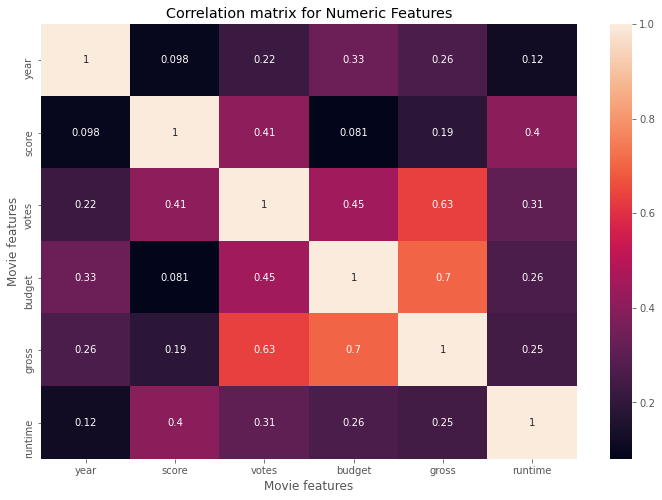

In [15]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [16]:
# Assigning a random numeric value for each unique categorical value

df_to_int = df.copy()

for col in df_to_int.columns:
    if(df_to_int[col].dtype == 'object'):
        df_to_int[col] = df_to_int[col].astype('category')
        df_to_int[col] = df_to_int[col].cat.codes
df_to_int        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,13266,884,90.0
7664,1678,6,4,2020,1107,4.7,36.0,774,2614,1886,55,7000,13266,539,90.0
7665,4717,6,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,13266,941,90.0
7666,2843,6,6,2020,2817,5.7,29.0,1184,1824,450,55,15000,13266,941,120.0


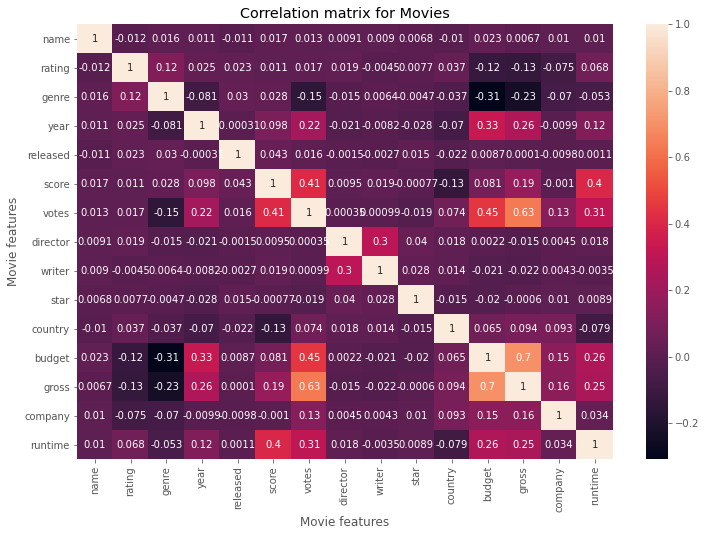

In [17]:
sns.heatmap(df_to_int.corr(), annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
cor_mat = df_to_int.corr()
corr_pairs = cor_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.011776
          genre       0.016355
          year        0.011453
          released   -0.010758
          score       0.017237
          votes       0.013038
          director    0.009079
          writer      0.009033
          star        0.006820
          country    -0.010127
          budget      0.022882
          gross       0.006747
          company     0.009980
          runtime     0.010448
rating    name       -0.011776
          rating      1.000000
          genre       0.116837
          year        0.025051
          released    0.022667
          score       0.011389
          votes       0.016909
          director    0.018842
          writer     -0.004470
          star        0.007728
          country     0.036900
          budget     -0.117510
          gross      -0.126848
          company    -0.075280
          runtime     0.068470
genre     name        0.016355
          rating      0.116837
        

In [20]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre     budget     -0.308228
budget    genre      -0.308228
genre     gross      -0.232776
gross     genre      -0.232776
genre     votes      -0.145296
votes     genre      -0.145296
country   score      -0.134361
score     country    -0.134361
gross     rating     -0.126848
rating    gross      -0.126848
budget    rating     -0.117510
rating    budget     -0.117510
genre     year       -0.081261
year      genre      -0.081261
runtime   country    -0.078803
country   runtime    -0.078803
rating    company    -0.075280
company   rating     -0.075280
genre     company    -0.070347
company   genre      -0.070347
country   year       -0.069859
year      country    -0.069859
genre     runtime    -0.052806
runtime   genre      -0.052806
genre     country    -0.036506
country   genre      -0.036506
year      star       -0.027871
star      year       -0.027871
writer    gross      -0.022491
gross     writer     -0.022491
country   released   -0.021963
released  country    -0.021963
budget  

In [21]:
# We can now take a look at the ones that have a high correlation (> 0.5)
strong_pairs = sorted_pairs[sorted_pairs > 0.5]
strong_pairs

gross     votes       0.632341
votes     gross       0.632341
budget    gross       0.701819
gross     budget      0.701819
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

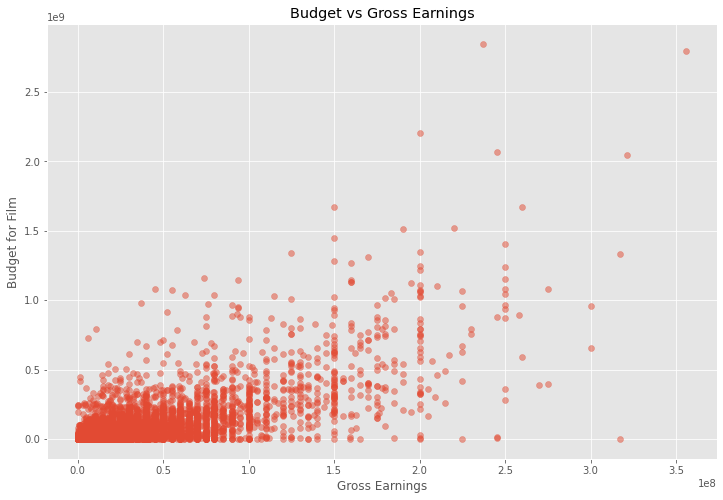

In [22]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()